In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# Percentage of frauds
fraud_percentage = df['Class'].value_counts(normalize=True)[1] * 100
print(f"Fraudulent Transactions: {fraud_percentage:.4f}%")

Fraudulent Transactions: 0.1727%


In [11]:
# PCA features (V1–V28) are already transformed, but Time and Amount are not scaled yet So they will be transformed by using StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
df_scaled = df.copy()

In [14]:
# Initialize the scaler
scaler = StandardScaler()

In [15]:
df_scaled['Time'] = scaler.fit_transform(df[['Time']])
df_scaled['Amount'] = scaler.fit_transform(df[['Amount']])

In [16]:
df_scaled[['Time', 'Amount']].head()

,Time,Amount
0,-1.996583,0.244964
1,-1.996583,-0.342475
2,-1.996562,1.160686
3,-1.996562,0.140534
4,-1.996541,-0.073403


In [17]:
# Now we split the data into training and test set and perform data imbalance

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
# Check the shape of each split
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.value_counts()}")

X_train: (199364, 30)
y_train: Class
0    199020
1       344
Name: count, dtype: int64


In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smote = SMOTE(random_state=42)

In [24]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [25]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: Class
0    199020
1       344
Name: count, dtype: int64
After SMOTE: Class
0    199020
1    199020
Name: count, dtype: int64


In [26]:
# Machine learning models

In [27]:
# Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [29]:
logreg = LogisticRegression(random_state=42, max_iter=1000) 

In [30]:
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [31]:
y_pred_logreg = logreg.predict(X_test)

In [32]:
# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



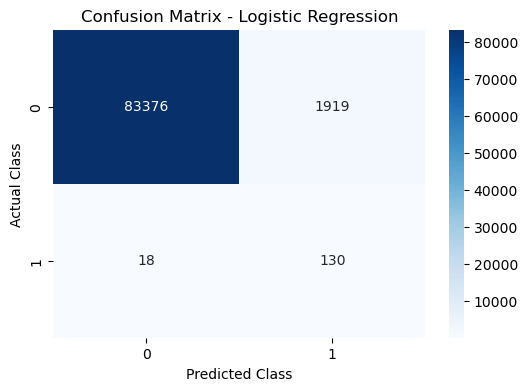

In [33]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

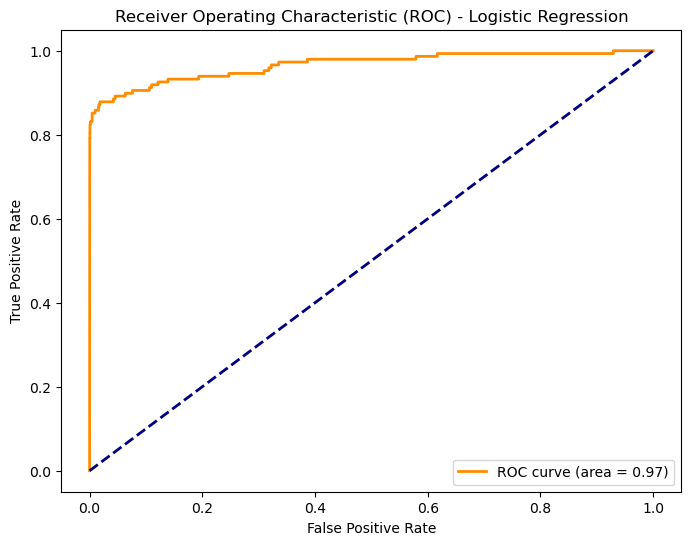

In [34]:
# Compute probabilities
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Random forest classifier model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [38]:
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [39]:
y_pred_rf = rf_model.predict(X_test)

In [40]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.79      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



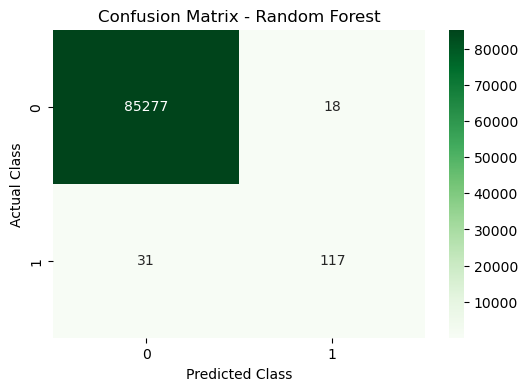

In [41]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [42]:
# Probabilities for ROC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

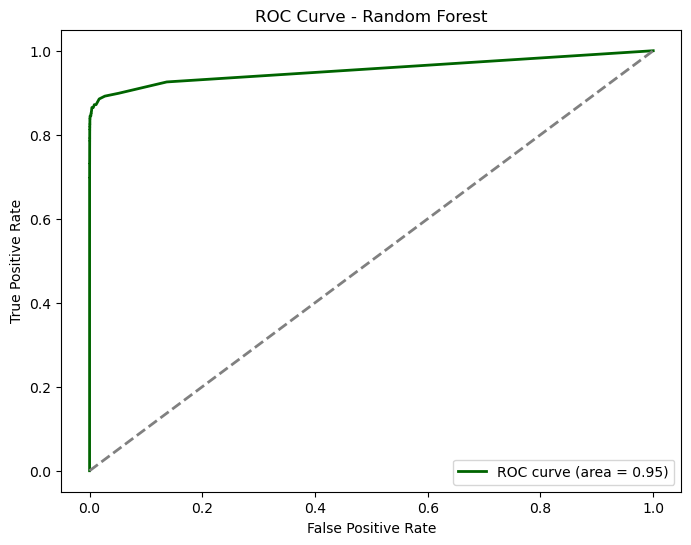

In [43]:
# ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [44]:
# AdaBoost Classifier Model

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
adaboost_model = AdaBoostClassifier(random_state=42, n_estimators=100)

In [47]:
adaboost_model.fit(X_train_resampled, y_train_resampled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [48]:
y_pred_adaboost = adaboost_model.predict(X_test)

In [49]:
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.10      0.86      0.18       148

    accuracy                           0.99     85443
   macro avg       0.55      0.93      0.59     85443
weighted avg       1.00      0.99      0.99     85443



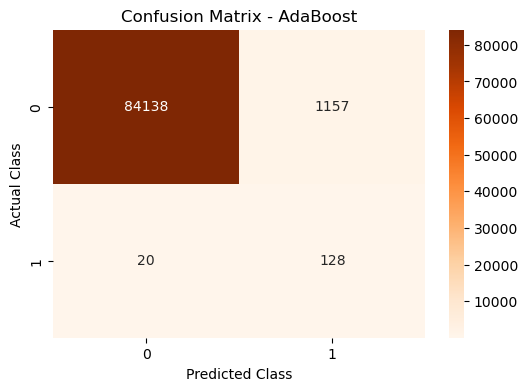

In [50]:
# Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [51]:
# Predict probabilities for ROC
y_pred_proba_ada = adaboost_model.predict_proba(X_test)[:, 1]

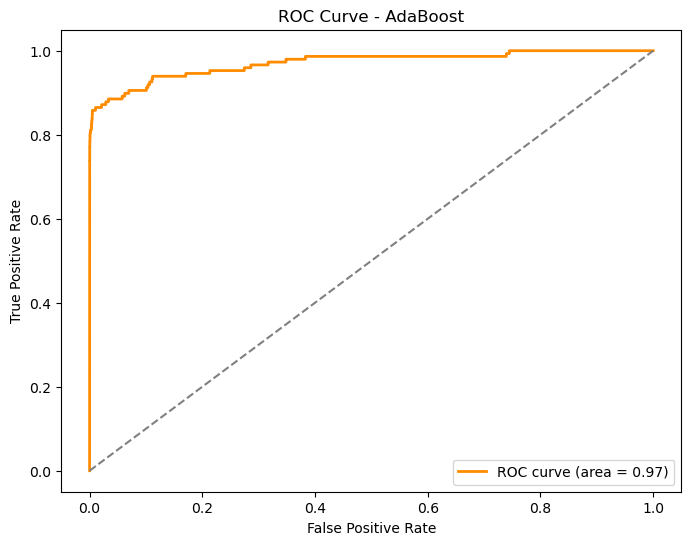

In [52]:
# ROC Curve
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

In [53]:
# XGBoost Classifier Model

In [54]:
from xgboost import XGBClassifier

In [55]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [56]:
xgb_model.fit(X_train_resampled, y_train_resampled)

C:\Users\DELL LATITUDE\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:09:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [57]:
y_pred_xgb = xgb_model.predict(X_test)

In [58]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.80      0.78       148

    accuracy                           1.00     85443
   macro avg       0.88      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443



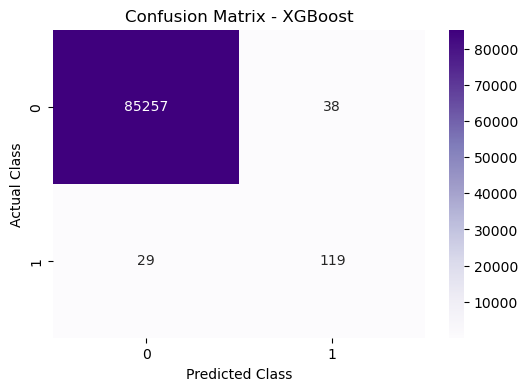

In [59]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [60]:
# Probabilities for ROC
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

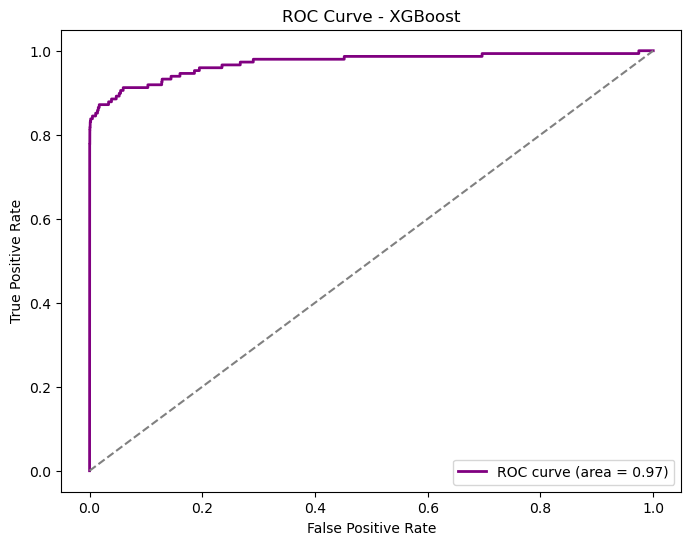

In [61]:
# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

In [62]:
# Comparison Charts between all the models

In [63]:
# Define metrics
models = ['LogReg', 'RandomForest', 'AdaBoost', 'XGBoost']
precision = [0.06, 0.87, 0.10, 0.76]
recall = [0.88, 0.79, 0.86, 0.80]
f1_score = [0.12, 0.83, 0.18, 0.78]
accuracy = [0.98, 1.00, 0.99, 1.00]

In [64]:
# Set width of bars and x locations
bar_width = 0.2
x = np.arange(len(models))

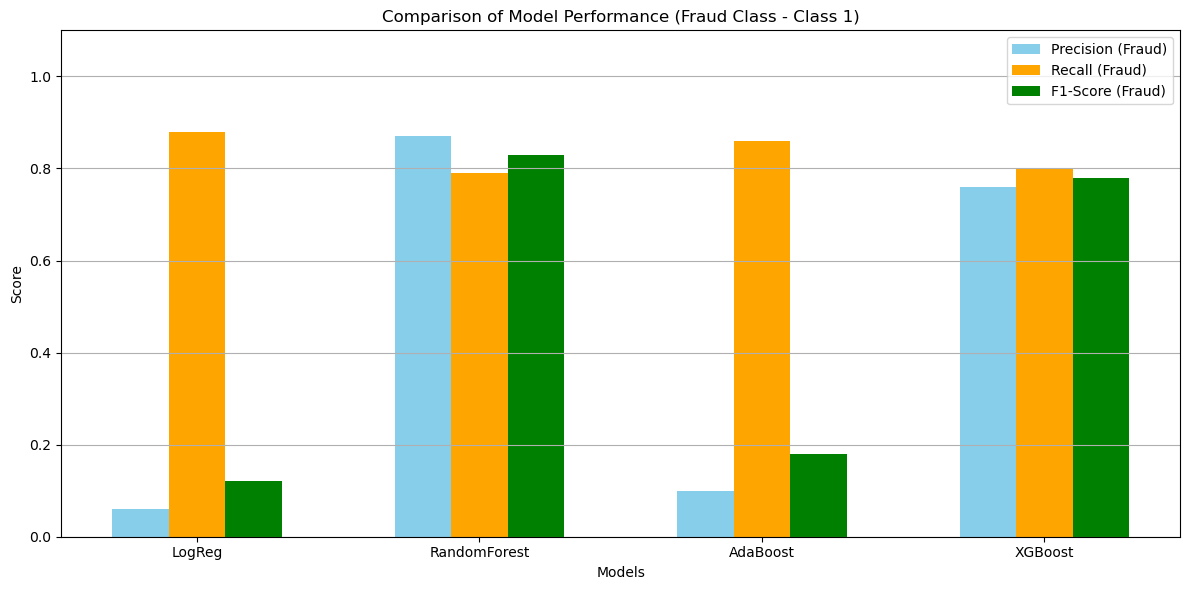

In [65]:
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x, precision, width=bar_width, label='Precision (Fraud)', color='skyblue')
plt.bar(x + bar_width, recall, width=bar_width, label='Recall (Fraud)', color='orange')
plt.bar(x + 2 * bar_width, f1_score, width=bar_width, label='F1-Score (Fraud)', color='green')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Model Performance (Fraud Class - Class 1)')
plt.xticks(x + bar_width, models)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

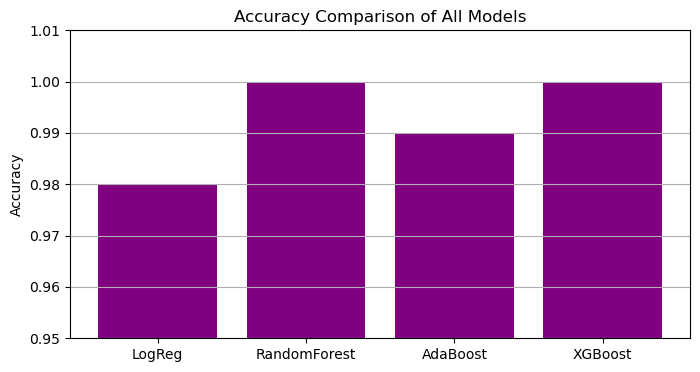

In [67]:
# Accuracy Comparison
plt.figure(figsize=(8, 4))
plt.bar(models, accuracy, color='purple')
plt.title('Accuracy Comparison of All Models')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1.01)
plt.grid(axis='y')
plt.show()